In [1]:
import pandas as pd
import scipy.stats as stats

In [3]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]

In [5]:
dict = {'A': data1, 'B': data2, 'C': data3}
df = pd.DataFrame(dict)
df

,A,B,C
0,0.873,1.142,-0.208
1,2.817,-0.432,0.696
2,0.121,-0.938,0.928
3,-0.945,-0.729,-1.148
4,-0.055,-0.846,-0.213
5,-1.436,-0.157,0.229
6,0.360,0.500,0.137
7,-1.478,1.183,0.269
8,-1.637,-1.075,-0.870
9,-1.869,-0.169,-1.204


# 1-Way Annova 

In [6]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], \
value_vars=['A', 'B', 'C'])

In [7]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'])
print("f Value:",fvalue)
print("p Value:", pvalue)

f Value: 0.09641783499925058
p Value: 0.9083957433926546


In [8]:
import matplotlib.pyplot as plt

In [10]:
def plt1(x1, y1):
    plt.scatter(x1,y1)
    plt.xlabel('1', fontsize = 20)
    plt.ylabel('2', fontsize = 20)

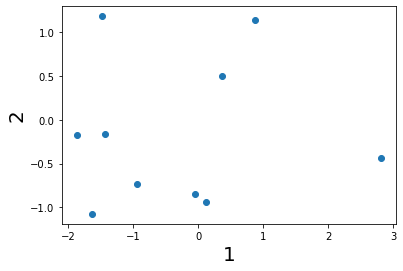

In [11]:
plt1(df['A'], df['B'])

# Assumption Verification
no auto correlation between A & B

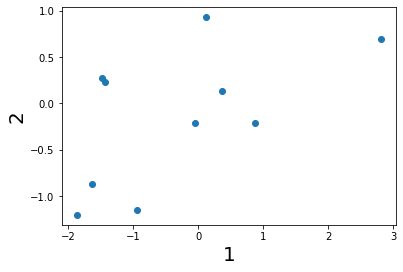

In [12]:
plt1(df['A'], df['C']) 

In [ ]:
#no auto correlation between A & C

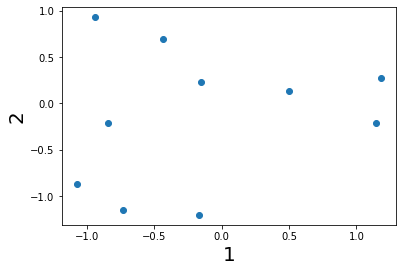

In [13]:
plt1(df['B'], df['C'])

In [17]:
#no auto correlation between B&C

In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [16]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [19]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

# Radial Basis Function

In [20]:
#It introduces some form of non-linearity to the model since the data in use is
#non-linear.
#By this, we mean that the data arrangement follows no specific sequence.

In [21]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\bangash87\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [22]:
y_pred = regressor.predict([[6.5]])
y_pred = sc_y.inverse_transform(y_pred)

In [23]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10], \
'gamma': [1e-7, 1e-4], \
'epsilon':[0.1,0.2,0.5,0.3]}

In [26]:
clf = GridSearchCV(regressor, parameters)
clf.fit(X,y)

C:\Users\bangash87\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bangash87\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bangash87\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bangash87\Documents\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')})

In [27]:
print('Best Hyperparameters: %s' % clf.best_params_)

Best Hyperparameters: {'C': 10, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}
